In [1]:
# Directories
import os
os.chdir(r"E:\academy\3. IIT DELHI\2. Academics\1_PAPER\2_Analysis")
print(os.getcwd())

E:\academy\3. IIT DELHI\2. Academics\1_PAPER\2_Analysis


# Source 
https://www.youtube.com/watch?v=a339Q5F48UQ

In [3]:
#Array packages
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nc4
from dask.distributed import Client

from scipy.stats import kendalltau
import pymannkendall as mk

#plots
import matplotlib.pyplot as plt
import rioxarray as rio
import geopandas as gpd
from shapely.geometry import mapping

#Progress meter
from dask.diagnostics import ProgressBar
from tqdm import tqdm

# Directories
import os
import glob
import dask
#import h5netcdf
import scipy


In [2]:
#Root directory
base='/home/civil/irdstaff/ird600406/'

## 1. Loading data

In [7]:
lulc = xr.open_mfdataset('DATA_p/NDVI_2000_2020.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
lulc

<xarray.Dataset>
Dimensions:      (x: 358, y: 391, time: 22)
Coordinates:
    band         int32 ...
  * x            (x) float64 66.97 67.06 67.15 67.24 ... 98.77 98.86 98.95 99.04
  * y            (y) float64 40.02 39.93 39.84 39.75 ... 5.255 5.165 5.075 4.986
    spatial_ref  int32 ...
  * time         (time) <U10 '2000-12-31' '2001-12-31' ... '2021-12-31'
Data variables:
    lulc         (time, y, x) float64 dask.array<chunksize=(22, 391, 358), meta=np.ndarray>

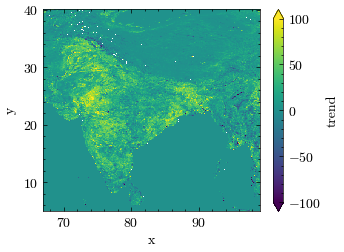

In [110]:
#lulc['lulc'].var(dim='time').compute().plot(vmin=1000,vmax=300000)
xrr1.trend.plot(vmin=-100,vmax=100)
plt.show()

#### 2.1 TREND CALCULATION XARRAY

In [111]:
%%time
import xarrayMannKendall as XMK
import dask
from dask import delayed
import graphviz

ds=lulc["lulc"]
MK_test = XMK.Mann_Kendall_test(ds, 'time')
xrr1=MK_test.compute()
#xrr1['trend']=xrr1.trend.where(xrr1.signif==1,0)    #To REMOVE NON SIGNIFICANT POINTS


C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


CPU times: total: 1min 16s
Wall time: 1min 34s


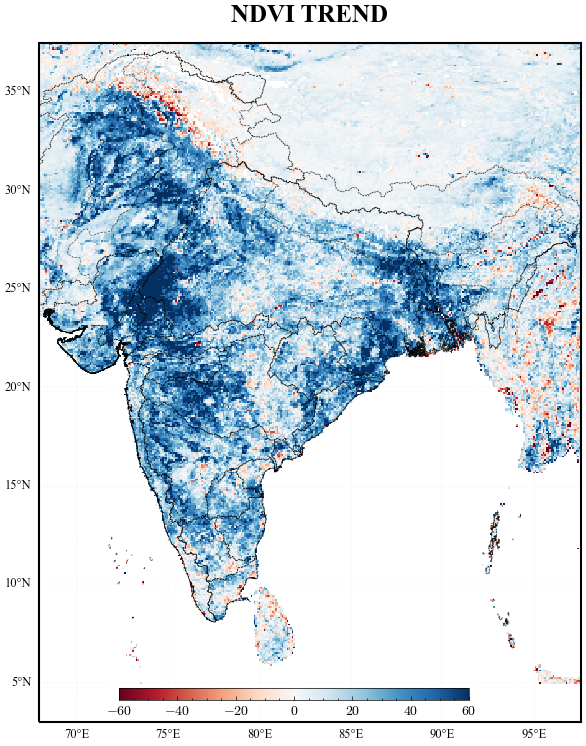

In [94]:
#xrr1.trend.where(xrr1.signif==1,0).plot(vmin=-10,vmax=10)
a=xrr1.where(xrr1.trend!=0).trend
Map_plot(a,-60,60,"NDVI TREND","s")
plt.savefig('5_LULC/trend_lulc.jpeg', bbox_inches='tight')
plt.show()

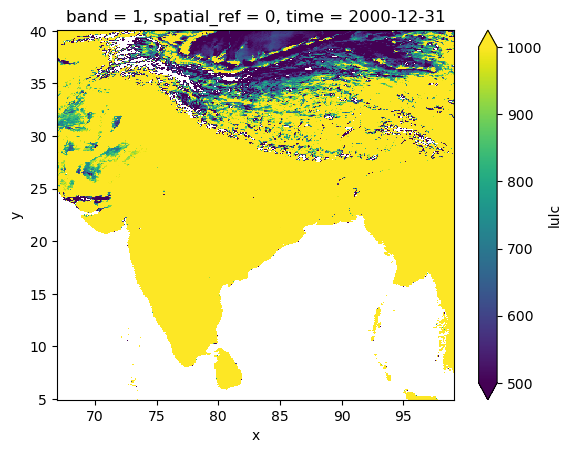

In [47]:
lulc["lulc"].isel(time=0).plot(vmin=500,vmax=1000)

In [41]:
result1[4].trend.sel(x=80,y=26,method='nearest')


<xarray.DataArray 'trend' ()>
array(0.)
Coordinates:
    x        float64 80.05
    y        float64 26.05

# Functions



### MAP

In [11]:
def Map_plot(xrr,vmin1,vmax1,plt_tit,cbar_tit):

    import matplotlib.pyplot as plt
    import matplotlib.animation as animation
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from cartopy.io.shapereader import Reader
    from cartopy.feature import ShapelyFeature
    import geopandas as gpd

    import matplotlib
    from matplotlib.colors import LinearSegmentedColormap
    from matplotlib.cm import ScalarMappable
    matplotlib.rcParams.update(matplotlib.rcParamsDefault)
    matplotlib.rcParams.update(matplotlib.rcParamsDefault)
    
    matplotlib.rcParams.update({'font.family': 'Times New Roman', 'font.size': 17, 'font.weight': 'bold'})

    
    fig = plt.figure(figsize=(7,7))
    axes = plt.axes(projection=ccrs.PlateCarree())
    axes.set_extent([67.90, 97.59, 4.5, 37.50], ccrs.PlateCarree())

    gl = axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=.15, color='black', alpha=0.5, linestyle='-.')
    gl.xlabel_style = {"size" : 11,'family': 'Times New Roman'}
    gl.ylabel_style = {"size" : 11,'family': 'Times New Roman'}
    gl.top_labels = False
    gl.right_labels = False

    # Set a custom x-axis label
    axes.text(0.5, -0.1, 'Longitude', transform=axes.transAxes, ha='center')            #fontfamily,fontsize, weight
    axes.text(-0.16, 0.5, 'Latitude', transform=axes.transAxes,
             va='center', rotation='vertical')

    #PLOT
    cmap1='RdBu' #viridis_r
    #xrr.plot.contourf(vmin=vmin1,vmax=vmax1 ,ax=axes, cmap=cmap1, add_labels=False, add_colorbar=False) #vector
    xrr.plot.imshow(vmin=vmin1,vmax=vmax1 ,ax=axes, cmap=cmap1, add_labels=False, add_colorbar=False) #pixeleted


    #shape_feature = ShapelyFeature(Reader('input/shapefile/India-States.shp').geometries(), ccrs.PlateCarree(), linewidth=1.5, facecolor='none', edgecolor='black')
    #axes.add_feature(shape_feature)
    axes.add_feature(cfeature.OCEAN, facecolor="white", edgecolor='black',)
    axes.add_feature(cfeature.LAND, linewidth=2, facecolor='white', edgecolor='black')
    axes.set_facecolor(None)
    axes.add_feature(cfeature.STATES, zorder=1, linewidth=.51, edgecolor='grey', linestyle='-.')


    #colourbar...it can be give either as an argument cbar_kwargs directly to contourf or using mappable
      #cbar_kwargs = {'orientation':'horizontal', 'shrink':0.6, "pad" : .05, 'aspect':40, 'label':'2 Metre Temperature Anomaly [K]'}

    cmap=cmap1
    sm1 = ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin1, vmax=vmax1))
    cbar=plt.colorbar(sm1,orientation="vertical", shrink=0.5, pad=.095, aspect=15, label = cbar_tit)
    cbar.ax.tick_params(axis='both', labelsize=13) 
    cbar.ax.yaxis.labelpad = 15
    cbar.ax.yaxis.label.set_fontsize(15)
  
    
    plt.title(plt_tit,fontsize=18,pad=15,fontname='Times New Roman',weight='bold')
    
    plt.show()
    #plt.savefig('output/1_Trendanalysis/Slope.png')
   

# Testing 

### 1. checking if two methods giving same results

In [94]:
lsm_M = xr.open_mfdataset('DATA_p/1_LIS_1980_2021_M.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
RE=lsm_M["Qs_tavg"]/lsm_M["TotalPrecip_tavg"]
#RE_corrected=RE.where(RE<1)
RE_corrected=RE

#reducing number of grids (if needed only, since huge data it might take some time)
lat_min,lat_max= np.min(RE_corrected["lat"].values),np.max(RE_corrected["lat"].values)
lon_min,lon_max= np.min(RE_corrected["lon"].values),np.max(RE_corrected["lon"].values)
lat_points=np.arange(lat_min,lat_max,1)
lon_points=np.arange(lon_min,lon_max,1)
RE_new=RE_corrected.sel(lat=lat_points, lon=lon_points, method="nearest")

In [95]:
#3 Trend analysis
import pymannkendall as mk

time,lat, lon = RE_new.coords.values()   #take care of order of cordinates(number and order)
x_lon,y_lat = np.meshgrid(lon.values,lat.values)
df = pd.DataFrame({"Lat" : y_lat.flatten(),"Lon": x_lon.flatten(), "slope": np.nan, "p_value": np.nan})
df

for i in tqdm(range(0,len(df))): 
    ts = RE_new.sel(lat = df.Lat[i],lon = df.Lon[i])
    if pd.isna(ts[1]):
        df.slope[i] = np.nan
    else:
        trend, h, p, z, Tau, s, var_s, slope, intercept = mk.original_test(ts)
        df.slope[i] = slope
        df.p_value[i] = p
    df.to_csv("Trend.csv")

  0%|                                                                                          | 0/960 [00:00<?, ?it/s]C:\Users\sstar\anaconda3\envs\paper1\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
  4%|███▌                                                                             | 42/960 [00:06<02:16,  6.73it/s]C:\Users\sstar\anaconda3\envs\paper1\lib\site-packages\dask\core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
100%|████████████████████████████████████████████████████████████████████████████████| 960/960 [08:01<00:00,  1.99it/s]


In [96]:
#Loading trend analysis results
df=pd.read_csv("Trend.csv",index_col=0)
#df.loc[df["p_value"]>0.05,"slope"]=0

dd=df.set_index(["Lat","Lon"])
xrr = dd.to_xarray()

C:\Users\sstar\AppData\Local\Temp\ipykernel_18588\4246946797.py:55: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar=plt.colorbar(sm1,orientation="vertical", shrink=0.5, pad=.095, aspect=15, label = cbar_tit)


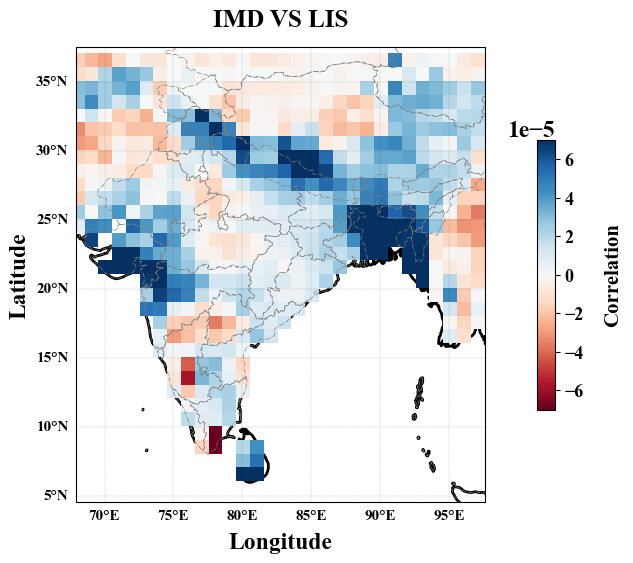

In [97]:
Map_plot(xrr.slope,-0.00007,0.00007,"IMD VS LIS","Correlation")

C:\Users\sstar\anaconda3\envs\paper1\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
C:\Users\sstar\anaconda3\envs\paper1\lib\site-packages\dask\core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
C:\Users\sstar\AppData\Local\Temp\ipykernel_18588\4246946797.py:55: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar=plt.colorbar(sm1,orientation="vertical", shrink=0.5, pad=.095, aspect=15, label = cbar_tit)


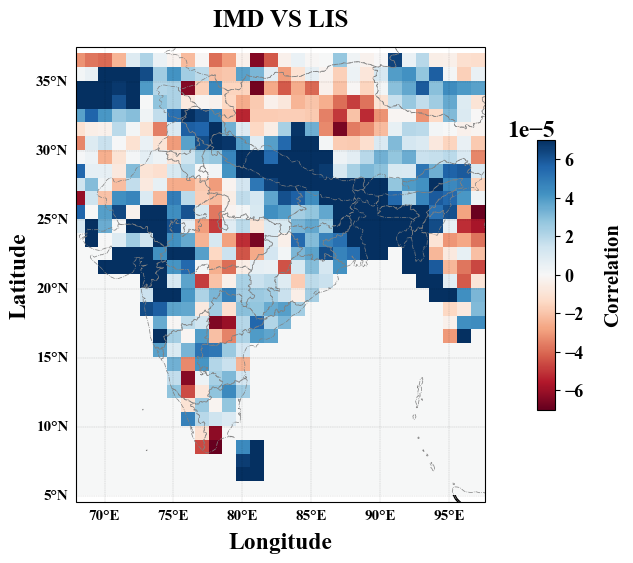

In [117]:
# Method 2 using github packagege
import xarrayMannKendall

lsm_M = xr.open_mfdataset('DATA_p/1_LIS_1980_2021_M.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
RE=lsm_M["Qs_tavg"]/lsm_M["TotalPrecip_tavg"]
RE=RE.where(RE<1)

#reducing number of grids (if needed only, since huge data it might take some time)
lat_min,lat_max= np.min(RE["lat"].values),np.max(RE["lat"].values)
lon_min,lon_max= np.min(RE["lon"].values),np.max(RE["lon"].values)
lat_points=np.arange(lat_min,lat_max,1)
lon_points=np.arange(lon_min,lon_max,1)
RE_new=RE.sel(lat=lat_points, lon=lon_points, method="nearest")


RE_new1=RE_new.rename({'lat': 'y', 'lon': 'x'})
MK_class = xarrayMannKendall.Mann_Kendall_test(RE_new1, 'time')
xrr1=MK_class.compute()
Map_plot(xrr1.trend,-0.00007,0.00007,"IMD VS LIS","Correlation")